In [ ]:
import stellargraph
from stellargraph import datasets

data = datasets.Cora()
data.head()


: 

In [8]:
from fastapi import FastAPI, Request, Response, Form, Depends, UploadFile, File, HTTPException, status
from fastapi.logger import logger
from fastapi.security import OAuth2PasswordBearer
import numpy as np
import pandas as pd
import os
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, concatenate, Flatten
from tensorflow.keras.models import load_model
from sklearn.metrics.pairwise import cosine_similarity
from dotenv import load_dotenv
import psycopg2
from numpy import save
from numpy import load
# import pickle5 as pickle
from json import loads, dumps
import jwt
import boto3
from sklearn.cluster import KMeans
import joblib
import math
# from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS,DBSCAN,AgglomerativeClustering,MeanShift
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
load_dotenv()


app = FastAPI(
    docs_url=None,
    redoc_url=None,
)
# handler = Mangum(app)

@app.get('/health-check')
async def healthCheck():
    return Response(content="hello world")

def initiate_dbaccess():
    DB_NAME = 'property_wallet'
    DB_USER = 'postgres'
    DB_PASS = 'Panasonic1'
    DB_HOST = 'karachihills.cquxw3hgishy.ap-south-1.rds.amazonaws.com'
    DB_PORT = '5432'

    conn = psycopg2.connect(database=DB_NAME,
                            user=DB_USER,
                            password=DB_PASS,
                            host=DB_HOST,
                            port=DB_PORT)

    return conn


conn=initiate_dbaccess()
print("Database connected successfully")

cur = conn.cursor()
cur.execute("""SELECT lambda_count."people_also_viewd" FROM lambda_count WHERE lambda_count."id"=1 """)
row=cur.fetchall()
print(row[0][0])
c1=row[0][0]+1
cur = conn.cursor()
cur.execute("""UPDATE lambda_count SET people_also_viewd = (%s) WHERE lambda_count."id"=1 """,(c1,))
conn.commit()

UserID=1
print(UserID)

cur = conn.cursor()

cur.execute("""SELECT DISTINCT IR."userId",IR."inventoryId" FROM inventory_recomendation as IR WHERE IR."userId"=(%s)""",(UserID,))
rows=cur.fetchall()
# print(rows)
if rows==[]:
    conn.close()
    print("Database connection closed")
    
cur = conn.cursor()
cur.execute("""SELECT DISTINCT IR."userId",IR."inventoryId" FROM inventory_recomendation as IR""")
rows=cur.fetchall()
if rows==[]:
    conn.close()
    print("Database connection closed")

colnames=[desc[0] for desc in cur.description]
newcol=[1 for i in range(len(rows))]
df=pd.DataFrame(rows,columns=colnames)
df["newcol"]=newcol
grouped = df.groupby('userId')["inventoryId"].apply(list).reset_index(name="inventories")
print(grouped)

userids = df.userId.drop_duplicates()
invid = df.inventoryId.drop_duplicates()
df1=pd.DataFrame(index=userids,columns=[])
df1.fillna(0,inplace=True)

print(df1)
for userid in grouped.userId:
    print(userid)
    invs=grouped[grouped.userId==userid]["inventories"]
    invs=invs.values
    for inv in invs[0]:
        print(inv)
        df1.loc[df1.index==userid,str(inv)]=1
        
        # .replace(0,1,inplace=True)
        
# df1.to_csv("dt.csv")
df1.fillna(0,inplace=True)




table = pd.pivot_table(df,index=df.userId,columns=df.inventoryId,values='newcol')
table.fillna(0,inplace=True)
print(table)

UID=UserID
u_rec=table[table.index==UID]

# algos = [AgglomerativeClustering, DBSCAN, MeanShift, OPTICS]
table_values = table.values  # Assuming 'table' is your data

# for algo in algos:
silhouette_scores = []
for i in range(2, len(table_values)):
    clusterer = MeanShift()
    labels = clusterer.fit_predict(table_values)
    silhouette_scores.append(silhouette_score(table_values, labels))

print("Silhouette Scores:", silhouette_scores)

# Choose the number of clusters that maximizes the silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal Number of Clusters:", optimal_num_clusters)

clustering =  MeanShift()
groups = clustering.fit_predict(table_values)

print("Cluster Labels:", groups)



df1["groups"] = groups
print(df1)
# grouped = grouped.values

# filtered_label0 = df1[groups == 0]
# filtered_label1 = df1[groups == 1]
# filtered_label2 = df1[groups == 2]
# filtered_label3 = df1[groups == 3]
# filtered_label4 = df1[groups == 4]
# filtered_label5 = df1[groups == 5]

# label0 = filtered_label0["groups"]
# label1 = filtered_label1["groups"]
# label2 = filtered_label2["groups"]
# label3 = filtered_label3["groups"]
# label4 = filtered_label4["groups"]
# label5 = filtered_label5["groups"]

# filtered_label0.drop(columns=['groups'])
# filtered_label1.drop(columns=['groups'])
# filtered_label2.drop(columns=['groups'])
# filtered_label3.drop(columns=['groups'])
# filtered_label4.drop(columns=['groups'])
# filtered_label5.drop(columns=['groups'])

# #Plotting the results
# print("data ",filtered_label0)
# sns.scatterplot(data=filtered_label0.values,x=df1.index.values,y=label0,color = 'red')
# sns.scatterplot(data=filtered_label1.values,x=df1.index.values,y=label1,color = 'black')
# sns.scatterplot(data=filtered_label2.values,x=df1.index.values,y=label2,color = 'yellow')
# sns.scatterplot(data=filtered_label3.values,x=df1.index.values,y=label3,color = 'blue')
# sns.scatterplot(data=filtered_label4.values,x=df1.index.values,y=label4,color = 'green')
# sns.scatterplot(data=filtered_label5.values,x=df1.index.values,y=label5,color = 'purple')


# df1
# print(df1)
# # print(grouped)

# filtered_label0 = grouped[groups == 0]
# filtered_label1 = grouped[groups == 1]
# filtered_label2 = grouped[groups == 2]

# plt.scatter(df1.values, c='blue',label='Scatter Plot')
# plt.title('Scatter Plot of your data')
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.legend()
# plt.show()





Database connected successfully
231
1
   userId                            inventories
0       1  [27, 5, 3, 1, 7, 20, 28, 68, 4, 6, 2]
1       3                                 [1, 4]
2       4                                    [1]
3       5                                    [7]
4      10                                    [1]
5      28                        [8, 28, 22, 18]
6      43                                   [24]
7      48                                   [55]
Empty DataFrame
Columns: []
Index: [4, 5, 28, 1, 48, 3, 43, 10]
1
27
5
3
1
7
20
28
68
4
6
2
3
1
4
4
1
5
7
10
1
28
8
28
22
18
43
24
48
55
inventoryId   1    2    3    4    5    6    7    8    18   20   22   24   27  \
userId                                                                         
1            1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3            1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4            1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

/tmp/ipykernel_9701/1095763949.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='groups', y='27', data=df1, jitter=True, alpha=0.5, marker='o', palette='Set1')


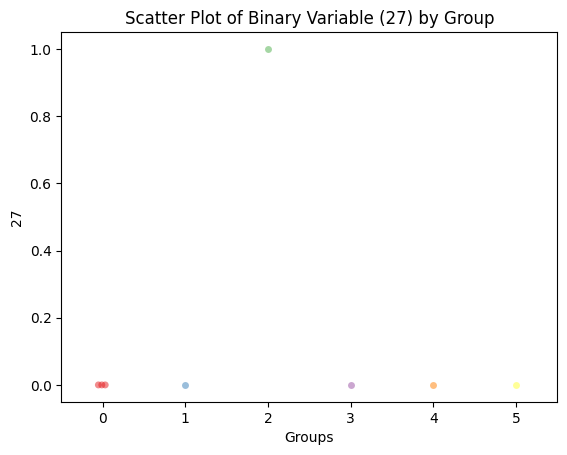

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.stripplot(x='groups', y='27', data=df1, jitter=True, alpha=0.5, marker='o', palette='Set1')

# Customize the plot
plt.title('Scatter Plot of Binary Variable (27) by Group')
plt.xlabel('Groups')
plt.ylabel('27')
plt.show()


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.pairplot(df1, hue='groups', markers=['o', 's', 'D'], palette='Set1')
plt.show()


/home/afnan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/afnan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/afnan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/afnan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/afnan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: 


KeyboardInterrupt: 